In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

In [2]:
plt.style.use("seaborn-darkgrid")

In [3]:
data=pd.read_csv("CC GENERAL.csv")


In [4]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data[data.duplicated()] 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [11]:
data.dropna(axis=0, inplace=True)


In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
data=data.drop(columns=["CUST_ID"], axis=1)

In [14]:
data.shape

(8949, 17)

<AxesSubplot:>

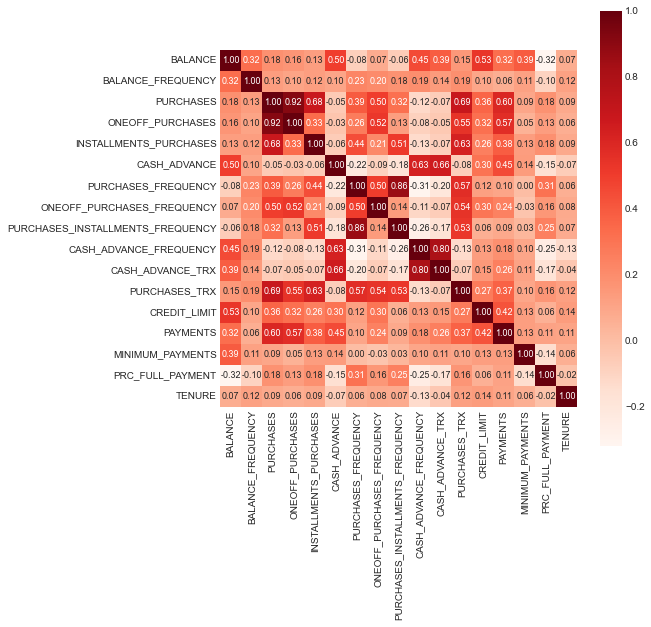

In [15]:
correlation=data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".2f", annot=True, annot_kws={"size":9},cmap="Reds")

In [16]:

for index in range(len(data.columns)):
        
    for i in range(len(data.columns)):
            
        if correlation.values[index][i]>= 0.5 and correlation.values[index][i]!=1:
            
            print(correlation.columns[index],"vs",correlation.columns[i], "------", correlation.iloc[index][i] ) 
        

BALANCE vs CREDIT_LIMIT ------ 0.5312834611329127
PURCHASES vs ONEOFF_PURCHASES ------ 0.9168436510439889
PURCHASES vs INSTALLMENTS_PURCHASES ------ 0.6798885937366914
PURCHASES vs PURCHASES_TRX ------ 0.6895517704224532
PURCHASES vs PAYMENTS ------ 0.6032519685836893
ONEOFF_PURCHASES vs PURCHASES ------ 0.9168436510439889
ONEOFF_PURCHASES vs ONEOFF_PURCHASES_FREQUENCY ------ 0.5248812578537019
ONEOFF_PURCHASES vs PURCHASES_TRX ------ 0.5455142383504036
ONEOFF_PURCHASES vs PAYMENTS ------ 0.567283144270986
INSTALLMENTS_PURCHASES vs PURCHASES ------ 0.6798885937366914
INSTALLMENTS_PURCHASES vs PURCHASES_INSTALLMENTS_FREQUENCY ------ 0.5113341749620979
INSTALLMENTS_PURCHASES vs PURCHASES_TRX ------ 0.628097019358736
CASH_ADVANCE vs CASH_ADVANCE_FREQUENCY ------ 0.6285346033402817
CASH_ADVANCE vs CASH_ADVANCE_TRX ------ 0.6564928493520323
PURCHASES_FREQUENCY vs ONEOFF_PURCHASES_FREQUENCY ------ 0.5013051913467168
PURCHASES_FREQUENCY vs PURCHASES_INSTALLMENTS_FREQUENCY ------ 0.86292095466

In [17]:
data.corr()["PURCHASES"].sort_values(ascending=False)

PURCHASES                           1.000000
ONEOFF_PURCHASES                    0.916844
PURCHASES_TRX                       0.689552
INSTALLMENTS_PURCHASES              0.679889
PAYMENTS                            0.603252
ONEOFF_PURCHASES_FREQUENCY          0.498413
PURCHASES_FREQUENCY                 0.392991
CREDIT_LIMIT                        0.356963
PURCHASES_INSTALLMENTS_FREQUENCY    0.315537
BALANCE                             0.181230
PRC_FULL_PAYMENT                    0.180356
BALANCE_FREQUENCY                   0.133586
MINIMUM_PAYMENTS                    0.093497
TENURE                              0.086155
CASH_ADVANCE                       -0.051495
CASH_ADVANCE_TRX                   -0.067194
CASH_ADVANCE_FREQUENCY             -0.120137
Name: PURCHASES, dtype: float64

In [18]:
data.corr()["PURCHASES_FREQUENCY"].sort_values(ascending=False)

PURCHASES_FREQUENCY                 1.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.862921
PURCHASES_TRX                       0.568408
ONEOFF_PURCHASES_FREQUENCY          0.501305
INSTALLMENTS_PURCHASES              0.442398
PURCHASES                           0.392991
PRC_FULL_PAYMENT                    0.305761
ONEOFF_PURCHASES                    0.264913
BALANCE_FREQUENCY                   0.229440
CREDIT_LIMIT                        0.119788
PAYMENTS                            0.103393
TENURE                              0.061006
MINIMUM_PAYMENTS                    0.002926
BALANCE                            -0.078054
CASH_ADVANCE_TRX                   -0.203541
CASH_ADVANCE                       -0.215579
CASH_ADVANCE_FREQUENCY             -0.308483
Name: PURCHASES_FREQUENCY, dtype: float64

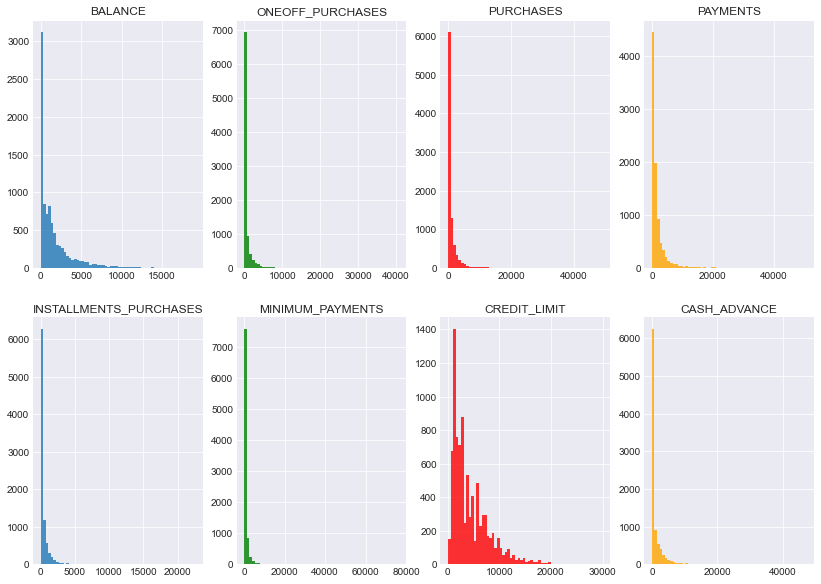

In [19]:
fig, ax = plt.subplots(2,4,figsize =(14,10))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = ax.flatten()

ax0.hist(data['BALANCE'], bins = 60, alpha =0.8 )
ax1.hist(data['ONEOFF_PURCHASES'], bins = 60, color="green" ,alpha =0.8 )
ax2.hist(data['PURCHASES'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data['PAYMENTS'], bins = 60, color="orange",alpha =0.8 )

ax4.hist(data['INSTALLMENTS_PURCHASES'], bins = 60, alpha =0.8 )
ax5.hist(data['MINIMUM_PAYMENTS'], bins = 60, color="green" ,alpha =0.8 )
ax6.hist(data['CREDIT_LIMIT'], bins = 60, color="red",alpha =0.8 )
ax7.hist(data['CASH_ADVANCE'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("BALANCE")
ax1.set_title('ONEOFF_PURCHASES')
ax2.set_title("PURCHASES")
ax3.set_title("PAYMENTS")
ax4.set_title("INSTALLMENTS_PURCHASES")
ax5.set_title("MINIMUM_PAYMENTS")
ax6.set_title("CREDIT_LIMIT")
ax7.set_title("CASH_ADVANCE")


plt.show()

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

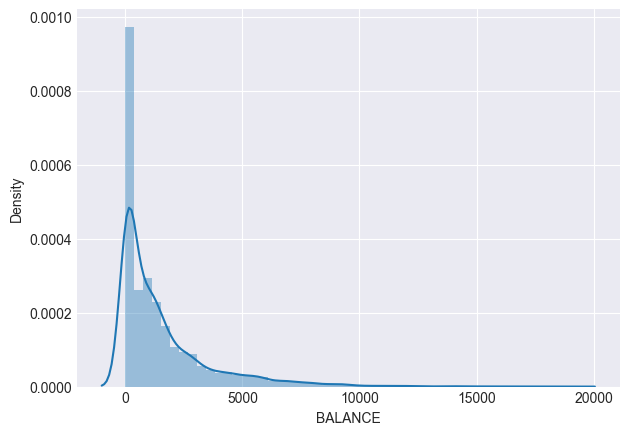

In [20]:
plt.figure(figsize=(7,5),dpi=(100))
sns.distplot(data["BALANCE"])

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

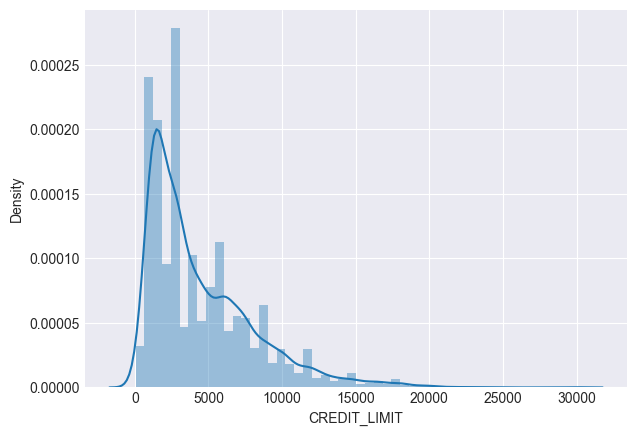

In [21]:
plt.figure(figsize=(7,5),dpi=(100))
sns.distplot(data["CREDIT_LIMIT"])

In [22]:
data["BALANCE"].sort_values(ascending=False).head(15)

138     19043.13856
4140    18495.55855
5488    16304.88925
6629    16259.44857
5281    16115.59640
2361    15532.33972
520     15258.22590
585     15244.74865
4708    15155.53286
883     14581.45914
643     14411.95798
124     14224.11541
3806    14100.25110
4089    13968.47957
5913    13777.37772
Name: BALANCE, dtype: float64

In [23]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
 
         'PAYMENTS', 'MINIMUM_PAYMENTS']

data2=data
for c in columns:
    
    data_n=data2[data2[c]<10000]
    data2=data_n

In [24]:
data_n.shape, data.shape

((7954, 17), (8949, 17))

In [25]:
data.shape[0] - data_n.shape[0]

995

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

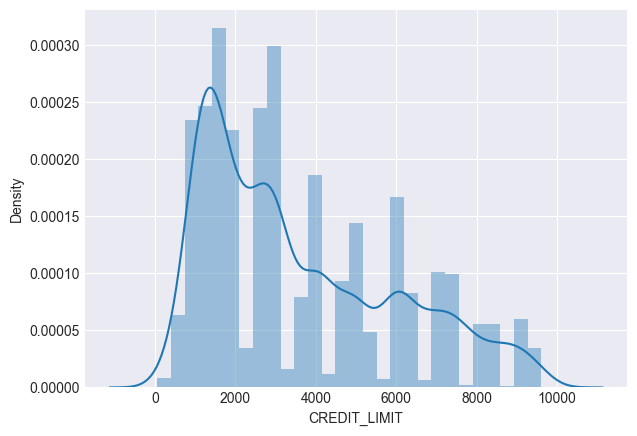

In [26]:
plt.figure(figsize=(7,5),dpi=(100))
sns.distplot(data_n["CREDIT_LIMIT"])

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

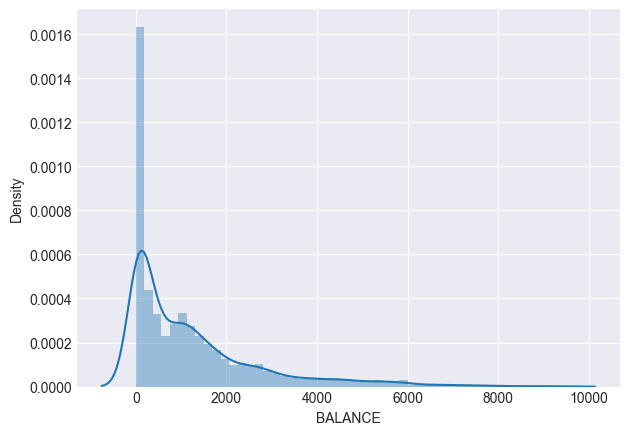

In [27]:
plt.figure(figsize=(7,5),dpi=(100))
sns.distplot(data_n["BALANCE"])

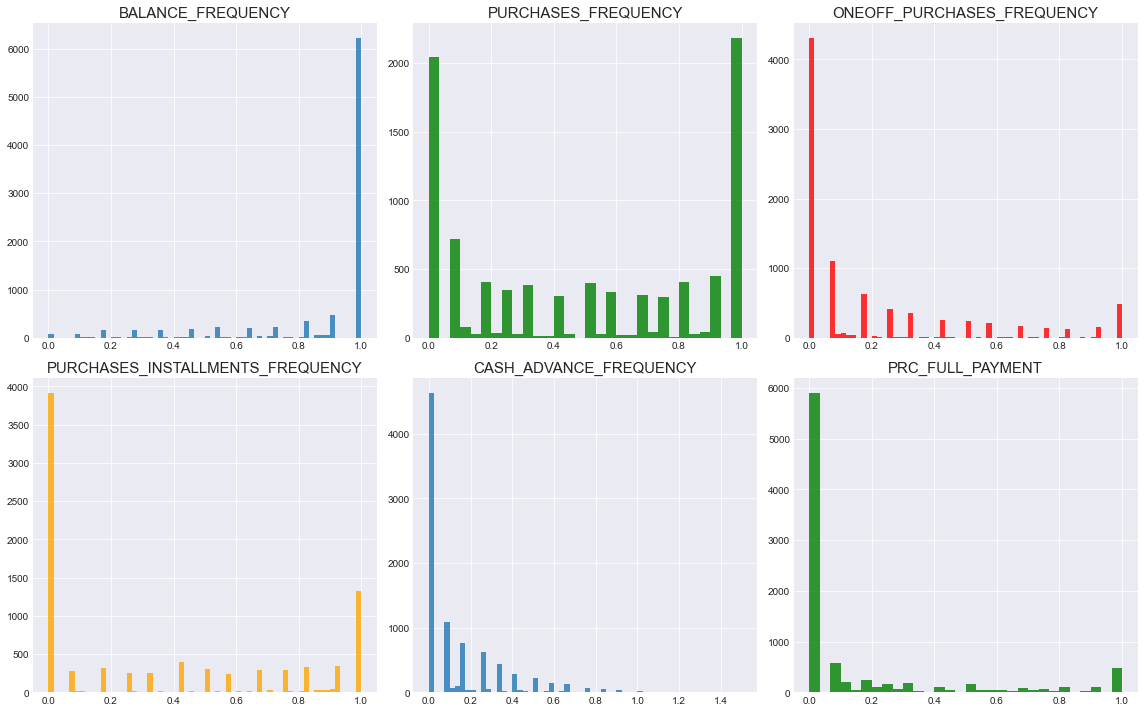

In [28]:
fig, ax = plt.subplots(2,3,figsize =(16,10))
ax0, ax1, ax2, ax3, ax4, ax5 = ax.flatten()

ax0.hist(data['BALANCE_FREQUENCY'], bins = 60, alpha =0.8 )
ax1.hist(data['PURCHASES_FREQUENCY'], bins = 30, color="green" ,alpha =0.8 )
ax2.hist(data['ONEOFF_PURCHASES_FREQUENCY'], bins = 60, color="red",alpha =0.8 )
ax3.hist(data['PURCHASES_INSTALLMENTS_FREQUENCY'], bins = 60, color="orange",alpha =0.8 )
ax4.hist(data['CASH_ADVANCE_FREQUENCY'], bins = 60, alpha =0.8 )
ax5.hist(data['PRC_FULL_PAYMENT'], bins = 30, color="green" ,alpha =0.8 )


ax0.set_title("BALANCE_FREQUENCY", fontsize=15)
ax1.set_title("PURCHASES_FREQUENCY",fontsize=15)
ax2.set_title("ONEOFF_PURCHASES_FREQUENCY",fontsize=15)
ax3.set_title("PURCHASES_INSTALLMENTS_FREQUENCY",fontsize=15)
ax4.set_title("CASH_ADVANCE_FREQUENCY",fontsize=15)
ax5.set_title("PRC_FULL_PAYMENT",fontsize=15)
plt.tight_layout()

plt.show()

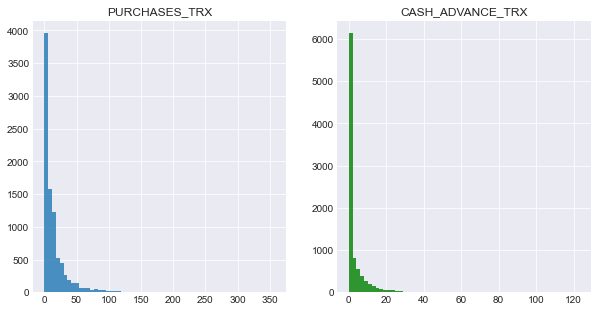

In [29]:
fig, ax = plt.subplots(1,2,figsize =(10,5))
ax0, ax1 = ax.flatten()

ax0.hist(data['PURCHASES_TRX'], bins = 60, alpha =0.8 )
ax1.hist(data['CASH_ADVANCE_TRX'], bins = 60, color="green" ,alpha =0.8 )

ax0.set_title("PURCHASES_TRX")
ax1.set_title('CASH_ADVANCE_TRX')



plt.show()

In [30]:
data_n

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [31]:
sc=StandardScaler()
data_scaled=sc.fit_transform(data_n)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.798760,-0.224159,-0.572343,-0.488939,-0.398940,-0.541445,-0.786469,-0.652423,-0.695480,-0.671702,-0.497794,-0.541808,-1.088324,-0.724498,-0.531433,-0.520939,0.371929
1,1.289882,0.153209,-0.652159,-0.488939,-0.551352,4.033674,-1.204414,-0.652423,-0.906534,0.645181,0.185312,-0.642175,1.428849,1.823224,0.488684,0.252775,0.371929
2,0.822603,0.530578,-0.005285,0.380696,-0.551352,-0.541445,1.303249,2.885784,-0.906534,-0.671702,-0.497794,-0.039975,1.638614,-0.450042,0.001984,-0.520939,0.371929
3,0.275281,-0.978895,0.601982,1.197085,-0.551352,-0.395316,-0.995443,-0.357573,-0.906534,-0.232743,-0.327018,-0.591991,1.638614,-0.856286,0.261075,-0.520939,0.371929
4,-0.285570,0.530578,-0.638773,-0.470943,-0.551352,-0.541445,-0.995443,-0.357573,-0.906534,-0.671702,-0.497794,-0.591991,-1.004418,-0.413296,-0.416300,-0.520939,0.371929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,-0.806957,0.530578,-0.408593,-0.488939,-0.086256,-0.541445,1.303249,-0.652423,1.204023,-0.671702,-0.497794,-0.341075,-1.088324,-0.643655,-0.630536,1.219918,-3.993526
7950,-0.813107,0.530578,-0.401164,-0.488939,-0.072069,-0.541445,1.303249,-0.652423,1.204023,-0.671702,-0.497794,-0.341075,-1.088324,-0.676133,0.261075,-0.520939,-3.993526
7951,-0.810323,-0.161266,-0.531347,-0.488939,-0.320657,-0.541445,0.885304,-0.652423,0.781913,-0.671702,-0.497794,-0.391258,-1.088324,-0.803212,-0.593867,0.349490,-3.993526
7952,-0.816890,-0.161266,-0.652159,-0.488939,-0.551352,-0.515485,-1.204414,-0.652423,-0.906534,0.206222,-0.156241,-0.642175,-1.298088,-0.821968,-0.623024,0.349490,-3.993526


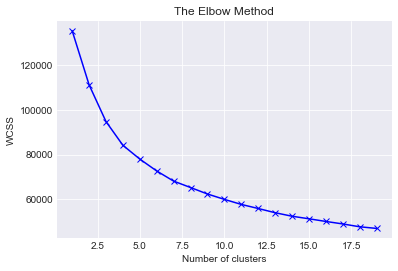

In [32]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss,"bx-")
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans=KMeans(n_clusters=6,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)
y_kmeans[:100]

array([1, 0, 5, 1, 1, 2, 2, 1, 2, 1, 5, 2, 1, 0, 1, 4, 2, 0, 0, 2, 1, 2,
       1, 2, 5, 1, 0, 5, 0, 1, 5, 1, 1, 5, 1, 4, 0, 3, 1, 5, 1, 5, 2, 1,
       1, 3, 1, 0, 1, 1, 0, 4, 2, 1, 1, 1, 5, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 4, 4, 3, 1, 0, 3, 0, 1, 1, 1, 1, 5, 1, 4, 4, 4, 2, 3, 4, 1, 1,
       2, 0, 2, 2, 1, 3, 0, 5, 5, 2, 1, 4])

In [34]:
clusters=pd.DataFrame(data=y_kmeans, columns=["clusters"])
clusters

,clusters
0,1
1,0
2,5
3,1
4,1
...,...
7949,2
7950,2
7951,2
7952,1


In [35]:
data_scaled=pd.concat([data_scaled, clusters], axis=1)


data_n=pd.concat([data_n,clusters], axis=1)
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-0.798760,-0.224159,-0.572343,-0.488939,-0.398940,-0.541445,-0.786469,-0.652423,-0.695480,-0.671702,-0.497794,-0.541808,-1.088324,-0.724498,-0.531433,-0.520939,0.371929,1
1,1.289882,0.153209,-0.652159,-0.488939,-0.551352,4.033674,-1.204414,-0.652423,-0.906534,0.645181,0.185312,-0.642175,1.428849,1.823224,0.488684,0.252775,0.371929,0
2,0.822603,0.530578,-0.005285,0.380696,-0.551352,-0.541445,1.303249,2.885784,-0.906534,-0.671702,-0.497794,-0.039975,1.638614,-0.450042,0.001984,-0.520939,0.371929,5
3,0.275281,-0.978895,0.601982,1.197085,-0.551352,-0.395316,-0.995443,-0.357573,-0.906534,-0.232743,-0.327018,-0.591991,1.638614,-0.856286,0.261075,-0.520939,0.371929,1
4,-0.285570,0.530578,-0.638773,-0.470943,-0.551352,-0.541445,-0.995443,-0.357573,-0.906534,-0.671702,-0.497794,-0.591991,-1.004418,-0.413296,-0.416300,-0.520939,0.371929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,-0.806957,0.530578,-0.408593,-0.488939,-0.086256,-0.541445,1.303249,-0.652423,1.204023,-0.671702,-0.497794,-0.341075,-1.088324,-0.643655,-0.630536,1.219918,-3.993526,2
7950,-0.813107,0.530578,-0.401164,-0.488939,-0.072069,-0.541445,1.303249,-0.652423,1.204023,-0.671702,-0.497794,-0.341075,-1.088324,-0.676133,0.261075,-0.520939,-3.993526,2
7951,-0.810323,-0.161266,-0.531347,-0.488939,-0.320657,-0.541445,0.885304,-0.652423,0.781913,-0.671702,-0.497794,-0.391258,-1.088324,-0.803212,-0.593867,0.349490,-3.993526,2
7952,-0.816890,-0.161266,-0.652159,-0.488939,-0.551352,-0.515485,-1.204414,-0.652423,-0.906534,0.206222,-0.156241,-0.642175,-1.298088,-0.821968,-0.623024,0.349490,-3.993526,1


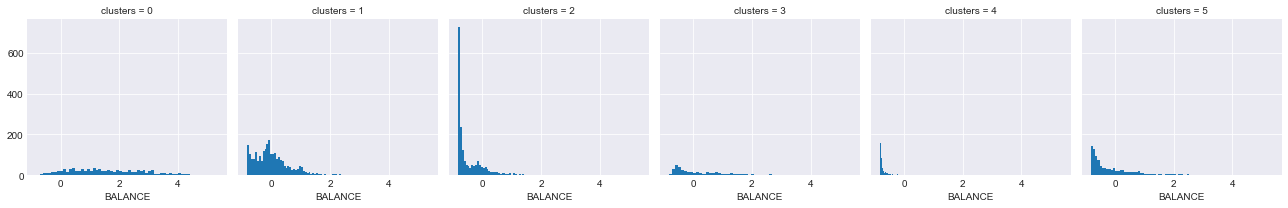

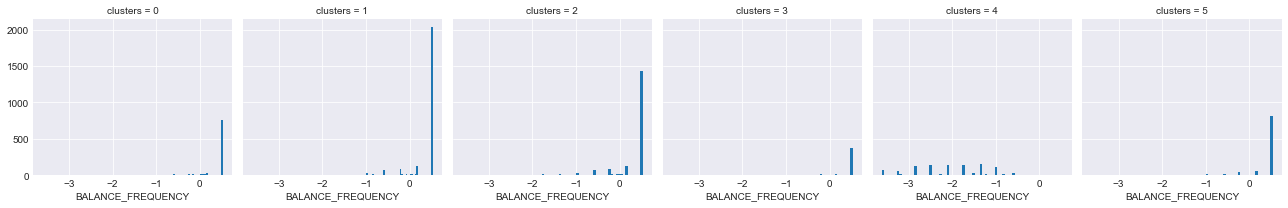

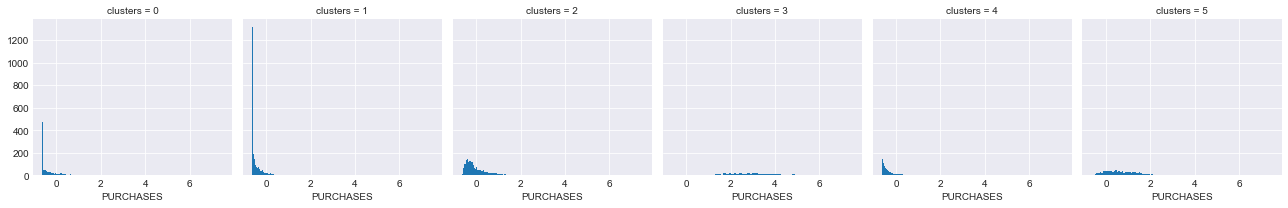

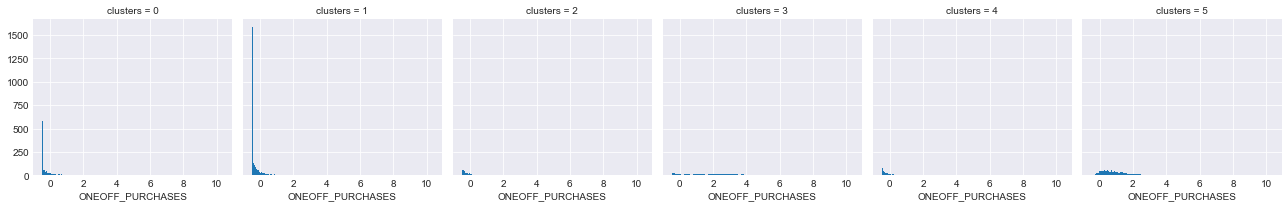

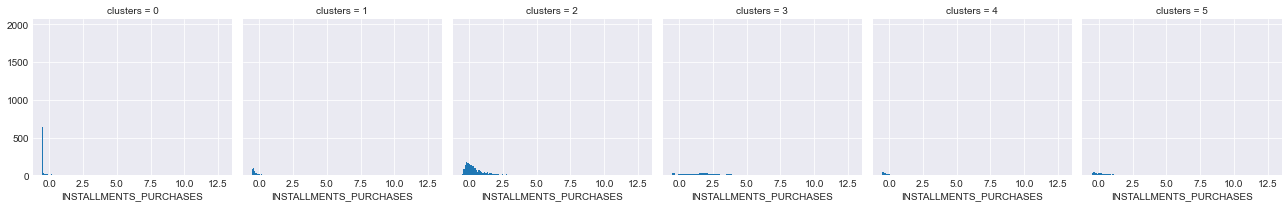

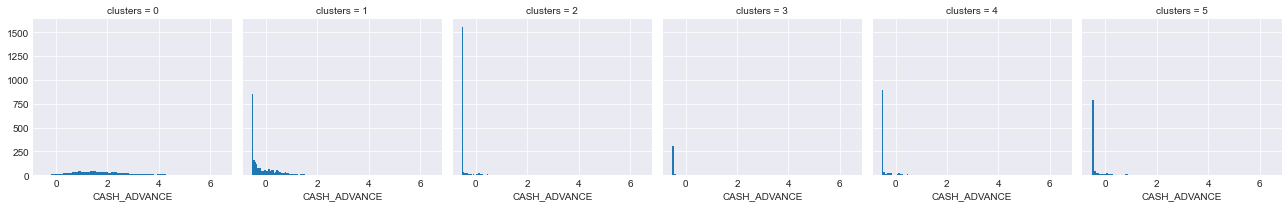

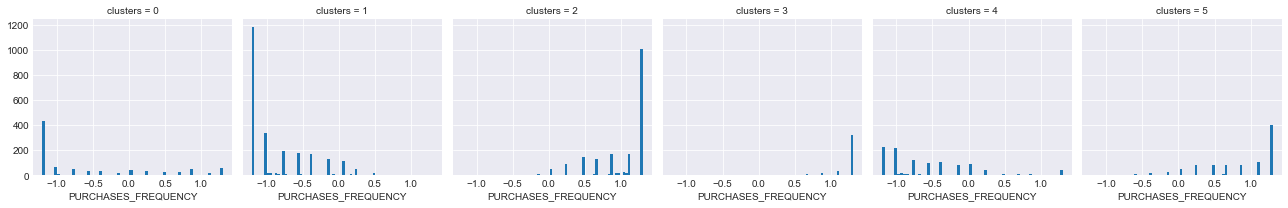

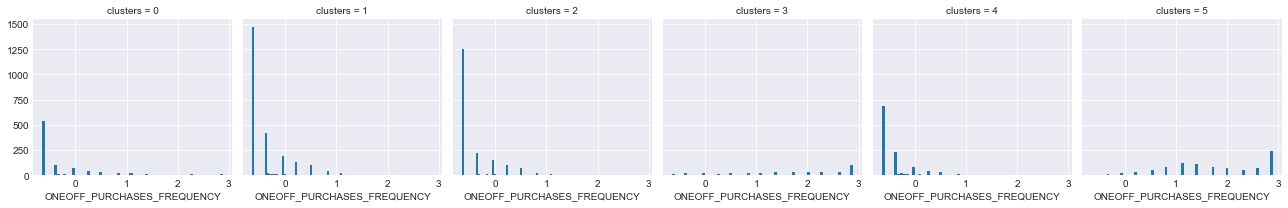

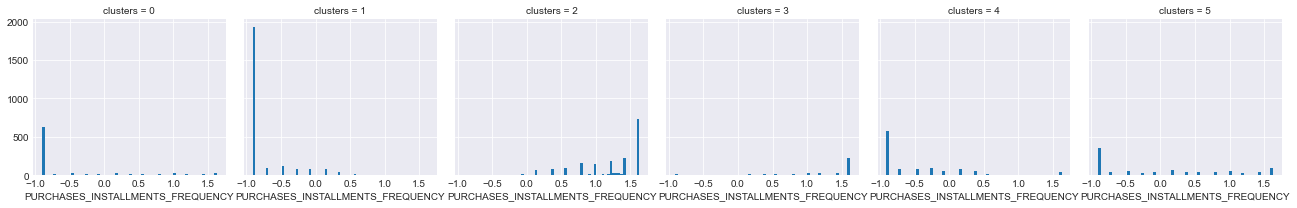

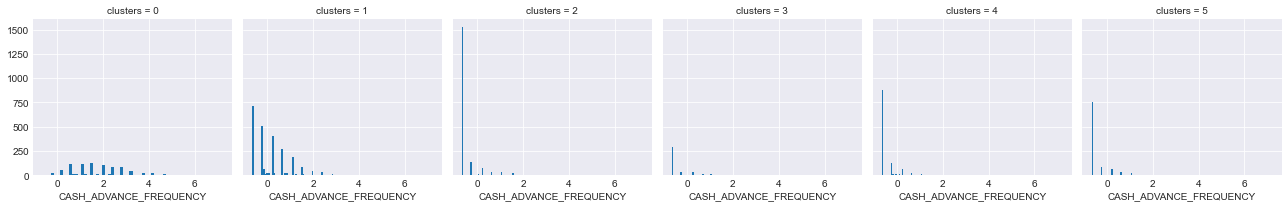

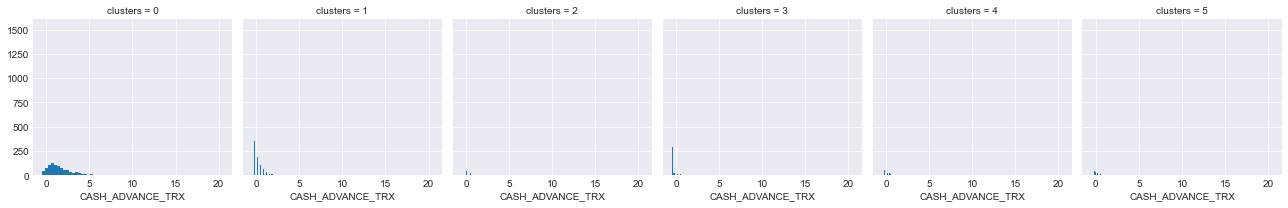

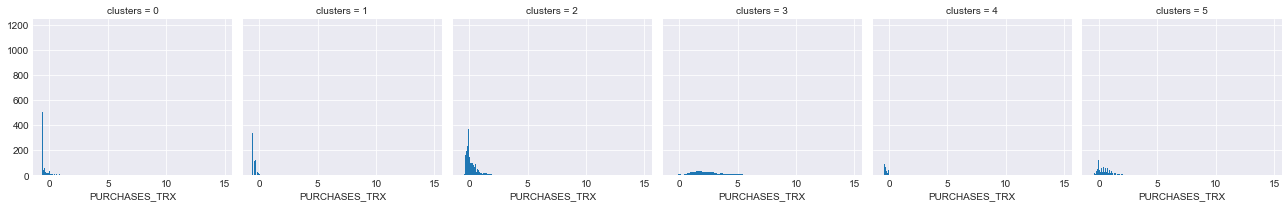

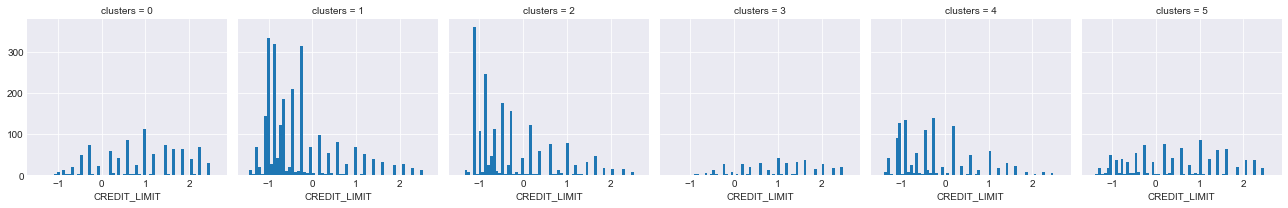

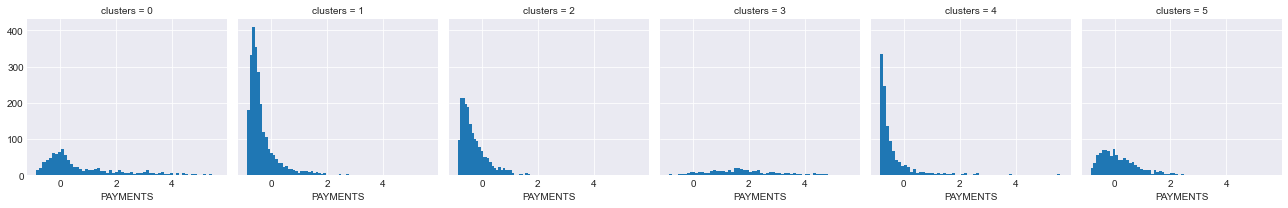

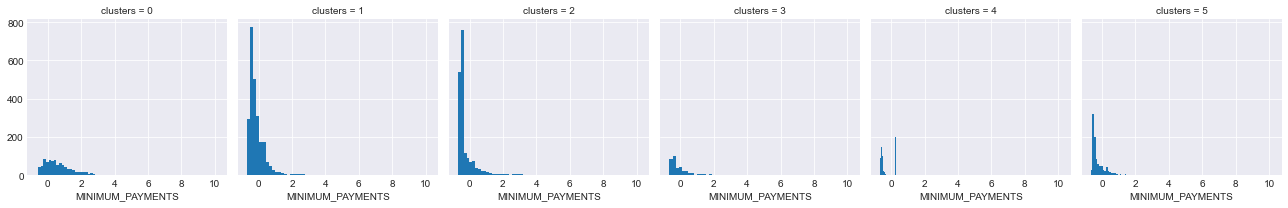

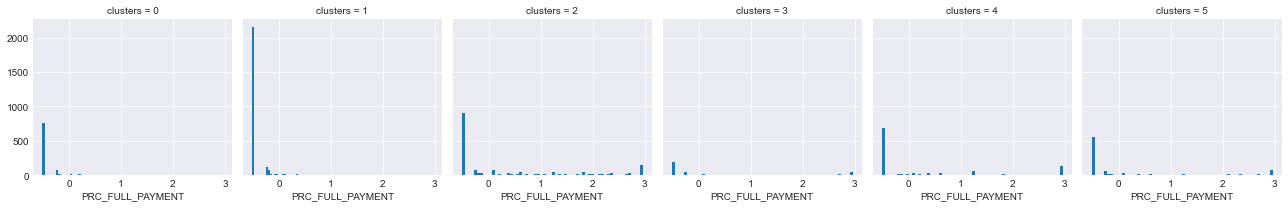

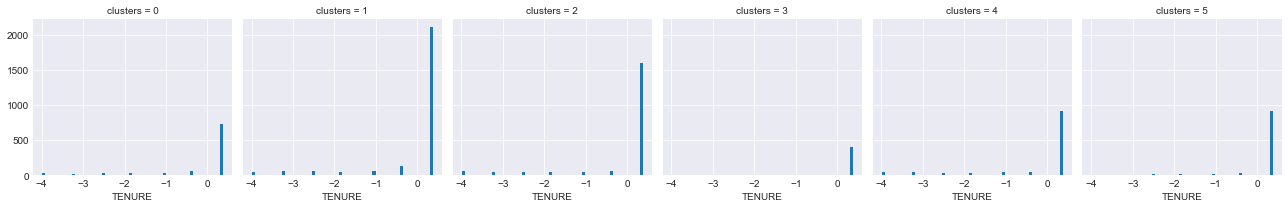

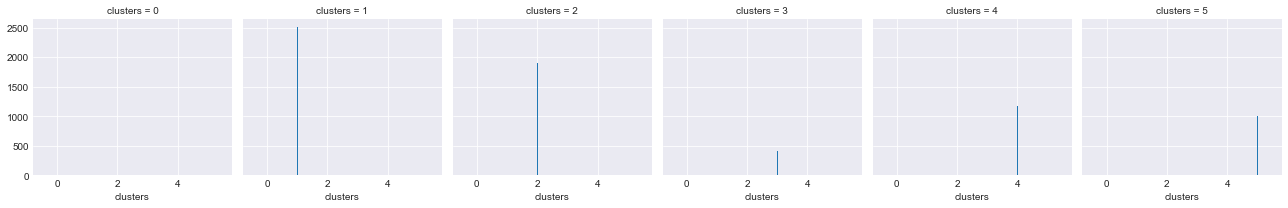

In [36]:
for i in data_scaled:
    grid= sns.FacetGrid(data_scaled, col='clusters')
    grid.map(plt.hist, i,bins=60 )

In [37]:
pca=PCA(n_components=10, whiten=True )
pca.fit(data_scaled)

x_pca=pca.transform(data_scaled)

print("variance ratio:", pca.explained_variance_ratio_)
print("sum:", sum(pca.explained_variance_ratio_))

variance ratio: [0.29503291 0.19981189 0.10275135 0.06678547 0.05609095 0.0532443
 0.0442003  0.0402233  0.03372453 0.02444227]
sum: 0.916307278968484


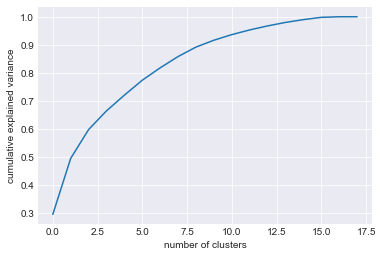

In [38]:
pca=PCA(whiten=True).fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of clusters")
plt.ylabel("cumulative explained variance")
plt.show()

In [39]:
df_sns=pd.DataFrame({"var":pca.explained_variance_ratio_,
                    "PC":["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18"]})

In [40]:
df_sns

,var,PC
0,0.295033,PC1
1,0.199812,PC2
2,0.102751,PC3
3,0.066785,PC4
4,0.056091,PC5
5,0.053244,PC6
6,0.044200,PC7
7,0.040223,PC8
8,0.033725,PC9
9,0.024442,PC10


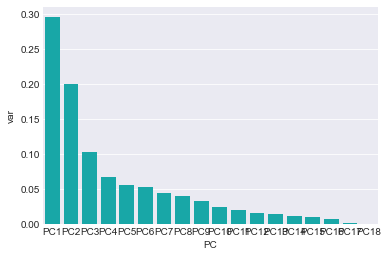

In [41]:
sns.barplot(x="PC",y="var", data=df_sns, color="c")
plt.ylabel=("Varience Explained")
plt.xlabel=("Principle Components")
plt.show()

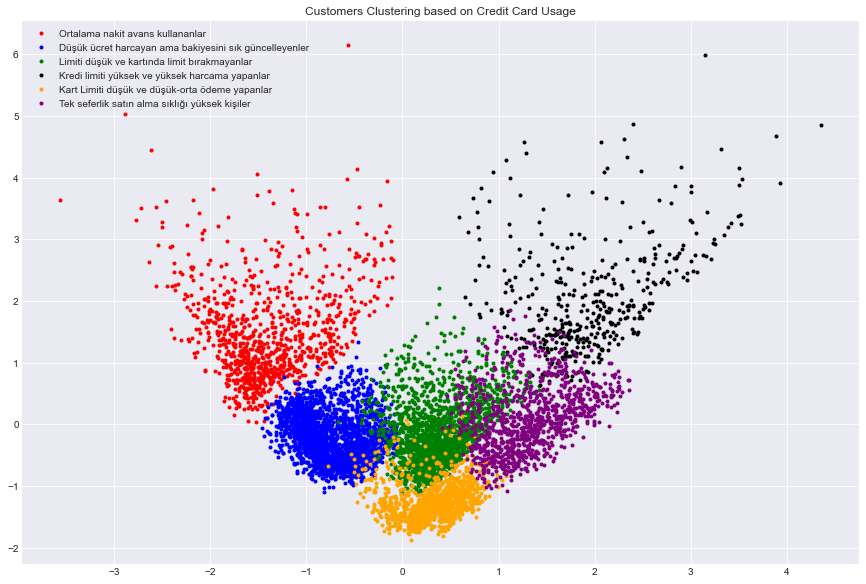

In [42]:
x, y = x_pca[:, 0], x_pca[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'black', 
          4: 'orange',
          5:'purple'
          }

names = {0: 'Ortalama nakit avans kullananlar', 
         1: 'Düşük ücret harcayan ama bakiyesini sık güncelleyenler ', 
         2: 'Limiti düşük ve kartında limit bırakmayanlar', 
         3: 'Kredi limiti yüksek ve yüksek harcama yapanlar', 
         4: 'Kart Limiti düşük ve düşük-orta ödeme yapanlar',
         5:'Tek seferlik satın alma sıklığı yüksek kişiler'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':y_kmeans}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4,
        color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Clustering based on Credit Card Usage")
plt.show()

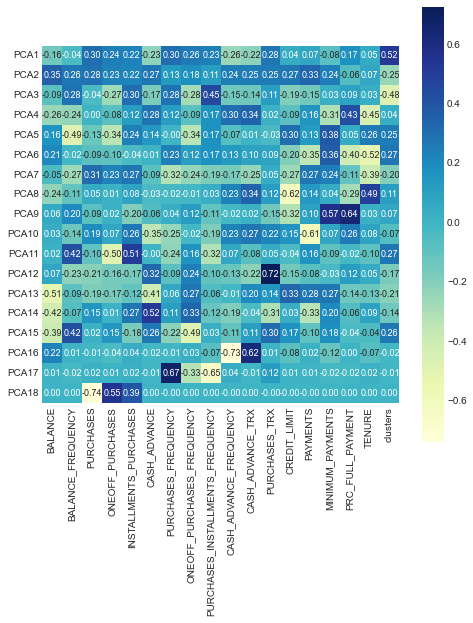

In [43]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(pca.components_ ,fmt=".2f", annot=True,annot_kws={"size":9},
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(data_scaled.columns))
                 
ax.set_aspect("equal")

https://www.kaggle.com/arjunbhasin2013/ccdata